In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import squidpy as sq
import anndata as ad

### raw slices

In [2]:
slice_Rep1 = sc.read_h5ad('/SABench/Data/BCA_processed/XeniumBCARep1_processed.h5ad')
slice_Rep2 = sc.read_h5ad('/SABench/Data/BCA_processed/XeniumBCARep2_processed.h5ad')

slice_namesX=['Xenium_Rep1','Xenium_Rep2']
groupX=[slice_Rep1,slice_Rep2]

/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [3]:
slice_Rep1

AnnData object with n_obs × n_vars = 167780 × 313
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'Cluster'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'Cluster_colors'
    obsm: 'spatial'

In [4]:
slice_Rep2

AnnData object with n_obs × n_vars = 118752 × 313
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'Cluster'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'Cluster_colors'
    obsm: 'spatial'

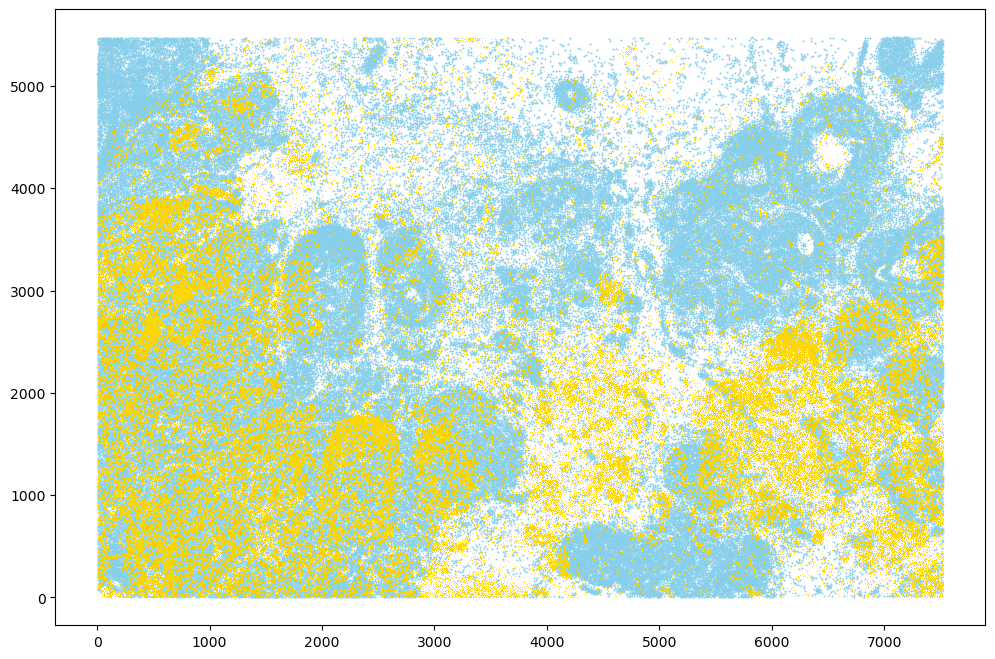

In [3]:
## plot style setup
fig = plt.figure(figsize=(12, 8))
ax = plt.gca()

ax.scatter(
    slice_Rep1.obsm['spatial'][:,0],
    slice_Rep1.obsm['spatial'][:,1],
    s=2,
    linewidth=0,
    edgecolor=None,
    marker="o",
    color='#B8474D'
)

ax.scatter(
    slice_Rep2.obsm['spatial'][:,0],
    slice_Rep2.obsm['spatial'][:,1],
    s=0.5,
    linewidth=0,
    edgecolor=None,
    marker="o",
    color="gold"
)

### pre-alignment

In [27]:
slice_Rep1_PA=slice_Rep1.copy()
slice_Rep2_PA=slice_Rep2.copy()

In [28]:
spatial_coords = slice_Rep2.obsm["spatial"].copy()
spatial_coords[:, 0] -= 500  
spatial_coords[:, 1] += 2000  

slice_Rep2_PA.obsm["spatial"] = spatial_coords

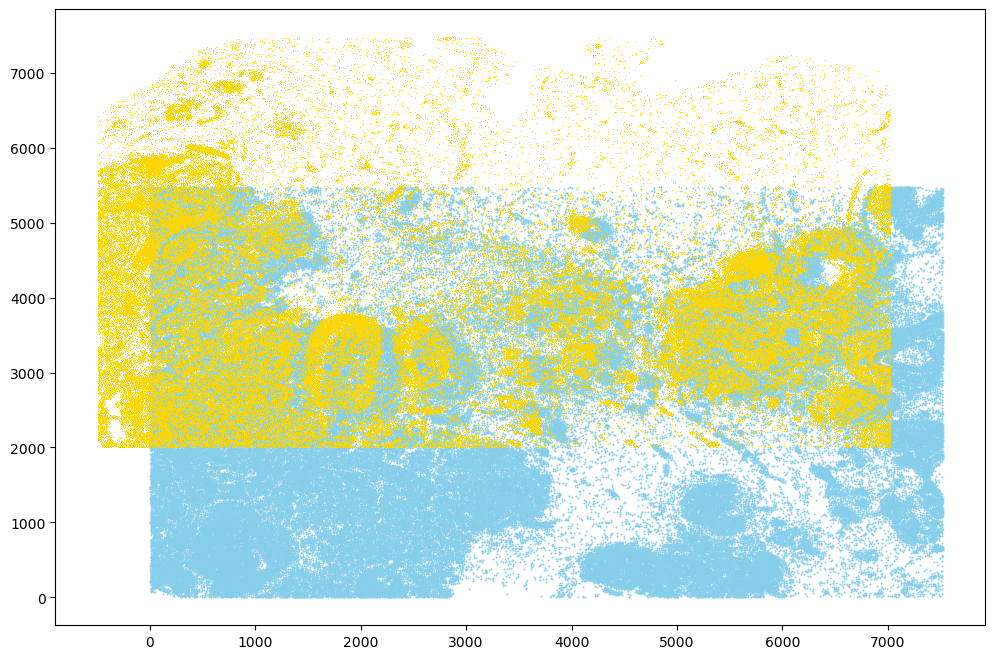

In [29]:
## plot style setup
fig = plt.figure(figsize=(12, 8))
ax = plt.gca()

ax.scatter(
    slice_Rep1_PA.obsm['spatial'][:,0],
    slice_Rep1_PA.obsm['spatial'][:,1],
    s=2,
    linewidth=0,
    edgecolor=None,
    marker="o",
    color="skyblue"
)

ax.scatter(
    slice_Rep2_PA.obsm['spatial'][:,0],
    slice_Rep2_PA.obsm['spatial'][:,1],
    s=0.5,
    linewidth=0,
    edgecolor=None,
    marker="o",
    color="gold"
)

### Save data

In [30]:
slice_Rep1_PA.write_h5ad('/SABench/Improvement/BCA_PA/Data_PA/slice_Rep1_PA.h5ad')
slice_Rep2_PA.write_h5ad('/SABench/Improvement/BCA_PA/Data_PA/slice_Rep2_PA.h5ad')